- Roboflow:

https://github.com/roboflow/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb

- Install DINO:

git clone https://github.com/IDEA-Research/GroundingDINO.git

pip install . --no-build-isolation

pip install --no-build-isolation -e .


- Download weights:

curl -L -o groundingdino_swint_ogc.pth https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

- install pytorch:

pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

set CUDA_VISIBLE_DEVICES=0

In [1]:
import os
HOME = os.getcwd()
print(HOME)  


c:\Users\SP1VEVW\Desktop\projects\OVD-Model-ADAS\installing_dino


In [2]:
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

c:\Users\SP1VEVW\Desktop\projects\OVD-Model-ADAS\installing_dino\GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [3]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "GroundingDINO", "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

c:\Users\SP1VEVW\Desktop\projects\OVD-Model-ADAS\installing_dino\GroundingDINO\weights\groundingdino_swint_ogc.pth ; exist: True


In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
print(f"PyTorch: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

Device: cuda
PyTorch: 2.7.1+cu118
CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA version: 11.8


In [4]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

final text_encoder_type: bert-base-uncased


In [28]:
device="cpu"
#device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

model = load_model(CONFIG_PATH, WEIGHTS_PATH)
IMAGE_PATH = r"C:\Users\SP1VEVW\Desktop\projects\OVD-Model-ADAS\data\Imagen1.jpg"
TEXT_PROMPT = "car"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device=device
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("annotated_image.jpg", annotated_frame)

final text_encoder_type: bert-base-uncased


True

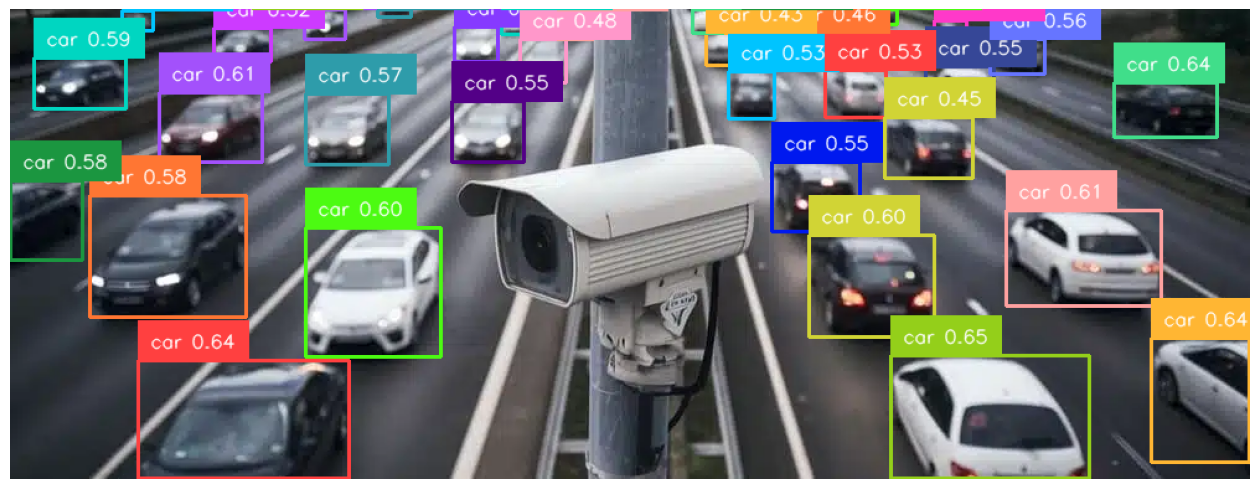

In [29]:
import supervision as sv

IMAGE_PATH = r"C:\Users\SP1VEVW\Desktop\projects\OVD-Model-ADAS\data\Imagen1.jpg"

TEXT_PROMPT = "car"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD,
    device=device
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

sv.plot_image(annotated_frame, (16, 16))